# KNN 方法
在最近邻方法中，为了对测试集中的每个样本进行分类，需要依次进行以下操作：

计算训练集中每个样本之间的距离。
从训练集中选取 k 个距离最近的样本。
测试样本的类别将是它 k 个最近邻中最常见的分类。
在回归问题中应用最近邻方法很简单，仅需将上述步骤做一个小小的改动：第三步不返回分类，而是返回一个数字，即目标变量在邻居中的均值或中位数。

这一方式的显著特点是它具有惰性：当需要对测试样本进行分类时，计算只在预测阶段进行。由于这种特点，最近邻方法事先并不基于训练样本创建模型，这与上文提到的决策树不同。决策树是基于训练集构建的，在预测阶段仅通过遍历决策树就可以实现快速地分类。

scikit-learn 的 KNeighborsClassifier 类
sklearn.neighbors.KNeighborsClassifier 类的主要参数为：

* weights：可设为 uniform（所有权重相等），
* distance（权重和到测试样本的距离成反比），或任何其他用户自定义的函数。
* algorithm（可选）：可设为 brute、ball_tree、KD_tree、auto。若设为 brute，通过训练集上的网格搜索来计算每个测试样本的最近邻；若设为 ball_tree 或 KD_tree，样本间的距离储存在树中，以加速寻找最近邻；若设为 auto，将基于训练集自动选择合适的寻找最近邻的方法。
* leaf_size（可选）：若寻找最近邻的算法是 BallTree 或 KDTree，则切换为网格搜索所用的阈值。
* metric：可设为 minkowski、manhattan、euclidean、chebyshev 或其他

通常采用下述两种方法之一来验证模型的质量：

* 留置法。保留一小部分数据（一般是 20% 到 40%）作为留置集，在其余数据上训练模型（原数据集的 60%-80%），然后在留置集上验证模型的质量。
* 交叉验证。最常见的情形是 k 折交叉验证，如下图所示。

在 k 折交叉验证中，模型在原数据集的 K−1K−1 个子集上进行训练（上图白色部分），然后在剩下的 1 个子集上验证表现，重复训练和验证的过程，每次使用不同的子集（上图橙色部分），总共进行 K 次，由此得到 K 个模型质量评估指数，通常用这些评估指数的求和平均数来衡量分类/回归模型的总体质量。
相比留置法，交叉验证能更好地评估模型在新数据上的表现。然而，当你有大量数据时，交叉验证对机器计算能力的要求会变得很高。   
交叉验证是机器学习中非常重要的技术，同时也应用于统计学和经济学领域。它有助于我们进行超参数调优、模型比较、特征评估等其他重要操作。你可以点击  这里以了解更多关于交叉验证的信息 。

## 应用举例
在客户离网率预测任务中使用决策树和最近邻方

In [73]:
import warnings
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv')


In [11]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# pd.factorize(df['International plan'])[0] 将 International plan 作为分类编码的特征
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]

df['Churn'] = df['Churn'].astype('int')

states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


* 之后将数据集的 70% 划分为训练集（X_train,y_train），30% 划分为留置集（X_holdout,y_holdout）。留置集的数据在调优模型参数时不会被用到，在调优之后，用它评定所得模型的质量。

* 接下来，训练 2 个模型：决策树和 k-NN。一开始，我们并不知道如何设置模型参数能使模型表现好，所以可以使用随机参数方法，假定树深（max_dept）为 5，近邻数量（n_neighbors）为 10。

In [61]:
from sklearn import tree 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [62]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
                                                          random_state=17)   # 分割数据

ValueError: Found input variables with inconsistent numbers of samples: [3333, 485]

In [63]:
tree = tree.DecisionTreeClassifier(max_depth=5, random_state=17)   # 决策树
tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [40]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

In [41]:
dot_data = StringIO()
export_graphviz(tree, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\r7\x00\x00\x03\x07\x08\x06\x00\x00\x00V\xdd\x82q\x00…

In [34]:
knn = KNeighborsClassifier(n_neighbors=10)    # KNN
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [38]:
from sklearn.metrics import accuracy_score

# 模型评估
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.94

In [36]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.881

从上可知，决策树的准确率约为 94%，k-NN 的准确率约为 88%，于是仅使用我们假定的随机参数（即没有调参），决策树的表现更好

现在，使用交叉验证确定树的参数，对每次分割的 max_dept（最大深度 h）和 max_features（最大特征数）进行调优。GridSearchCV() 函数可以非常简单的实现交叉验证，下面程序对每一对 max_depth 和 max_features 的值使用 5 折验证计算模型的表现，接着选择参数的最佳组合。

In [42]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [43]:
tree_params = {'max_depth': range(5,7),
              'max_features': range(16,18)}

# -1 use all methods, cv cross validation Controls the verbosity: the higher, verbose the more messages
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)   

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 7),
                         'max_feat

In [44]:
tree_grid.best_params_   # 训练之后的参数选择

{'max_depth': 6, 'max_features': 17}

In [45]:
tree_grid.best_score_   # 训练后的评分

0.94257014456259

In [46]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))  # 与测试集比较

0.946

In [47]:
# 绘制决策树
dot_data = StringIO()
export_graphviz(tree_grid.best_estimator_, feature_names=df.columns,
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x11H\x00\x00\x03\x91\x08\x06\x00\x00\x00>L\xff6\x00\…

In [48]:
# 再次使用交叉验证对KNN的K 调整
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
knn_pipe = Pipeline([('scaler', StandardScaler()),
                     ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(6, 8)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1,
                        verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished


({'knn__n_neighbors': 7}, 0.8859867109023905)

In [50]:
knn_grid.best_params_

{'knn__n_neighbors': 7}

In [51]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

综上所述，在这个任务里，决策树有着 94%/94.6%（留置法/交叉验证调优后）的准确率，k-NN 有着 88%/89%（留置法/交叉验证调优后）的准确率，显然决策树的表现更好

### 随机森林
相互协作的决策树

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                                random_state=17)
np.mean(cross_val_score(forest, X_train, y_train, cv=5))

0.9494233119813256

In [53]:
forest_params = {'max_depth': range(8, 10),
                 'max_features': range(5, 7)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)
forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.3s finished


({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [54]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.953

从上可知，随机森林有着 95.3% 的准确率。不得不说，决策树在这个任务上的表现非常好，即使是训练时间长得多的随机森林也无法取得比它更好的表现。

## 复杂情况
* 为了继续讨论决策树和 k-NN 的优劣，让我们考虑另外一个简单的分类任务，在这个任务中决策树的表现不错但得到的分类边界过于复杂。

* 首先，在一个平面上创建一组具有 2 个分类的数据点，每个数据点是两个分类中的一个（红色表示  x1>x2x1>x2 ，黄色表示  x1<x2x1<x2 ），其实用一条直线  x1=x2x1=x2  就可以完成它们的分类，那么决策树会这么做吗？

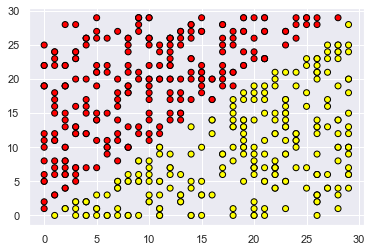

In [74]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30,
                                 x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)


X, y = form_linearly_separable_data()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black')

In [78]:
import warnings
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
from sklearn import tree

tree = tree.DecisionTreeClassifier(random_state=17).fit(X, y)

Text(0.5, 1.0, 'Easy task. Decision tree compexifies everything')

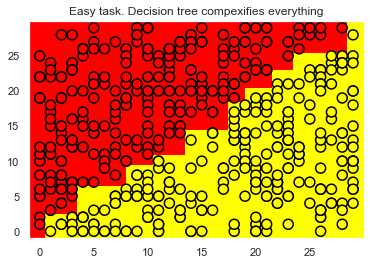

In [85]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything')

In [79]:
dot_data = StringIO()
export_graphviz(tree, feature_names=['x1', 'x2'],
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\xcb\x00\x00\x03\x91\x08\x06\x00\x00\x00\xb4\xb3\…

In [86]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task, kNN. Not bad')

KeyboardInterrupt: 

# 在 MNIST 手写数字识别任务中应用决策树和 k-NN

In [96]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target
X, y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

使用 train_test_split() 方法分割数据集，其中的 70% 作为训练集（X_train，y_train），30% 作为留置集（X_holdout，y_holdout）。

In [97]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17)

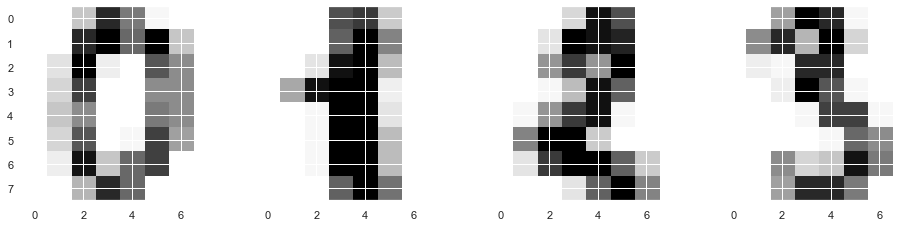

In [98]:
# 绘制手写数字
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap='Greys')

In [99]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(max_depth=5, random_state=17)
tree.fit(X_train, y_train)  # 决策树

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [100]:
knn_pipe = Pipeline([('scaler', StandardScaler()),
                     ('knn', KNeighborsClassifier(n_neighbors=10))])
knn_pipe.fit(X_train, y_train)   # knn

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=10, p=2,
                                      weights='uniform'))],
         verbose=False)

In [101]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.975925925925926, 0.6666666666666666)

从上可知，k-NN 做得更好，不过别忘了我们用的是随机参数。现在，使用交叉验证调优决策树模型，因为这次任务所需考虑的特征比之前任务中的更多，所以可以增加参数的大小。

In [102]:
# 交叉验证决策树
tree_params = {'max_depth': [10, 20, 30],
               'max_features': [30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_fea

In [103]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [104]:
# 交叉验证KNN
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.9864858028204642

In [105]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5))   # 随机森林准确率

0.9753462341111744

|   算法\方式      |   留置法  | 交叉验证 |  
|---------|-------|---------|
| 决策树  | 0.667 |  0.844  |  
| k-NN | 0.976 |  0.987  |
| 随机森林  | / |  0.934  | 

建议： 首先查看简单模型（决策树、最近邻）在你的数据上的表现，因为可能仅使用简单模型就已经表现得足够好了

**特征和目标变量成比例**

In [106]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)
    # 第一个特征与目标成比例
    x1 = 0.3 * y
    # 其他特征为噪声
    x_other = np.random.random(size=[n_obj, n_feat - 1])
    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y


X, y = form_noisy_data()
X,y

(array([[-0.3       ,  0.11733241,  0.66900518, ...,  0.99426955,
          0.31224277,  0.26589868],
        [-0.3       ,  0.94913058,  0.02238141, ...,  0.34396498,
          0.8123785 ,  0.83355542],
        [ 0.3       ,  0.78778512,  0.49092342, ...,  0.76253573,
          0.38905102,  0.26178845],
        ...,
        [ 0.3       ,  0.78078632,  0.53020208, ...,  0.07206526,
          0.64059123,  0.33225639],
        [-0.3       ,  0.32263006,  0.03692318, ...,  0.2686536 ,
          0.74637079,  0.25053376],
        [ 0.3       ,  0.96118433,  0.05742857, ...,  0.34629769,
          0.53976057,  0.39039812]]),
 array([-1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,
         1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
         1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,
        -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
         1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  

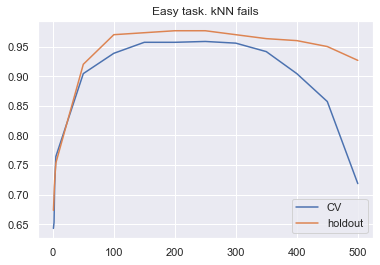

In [108]:
from sklearn.model_selection import cross_val_score
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17)


cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn_pipe = Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=k))])
    cv_scores.append(np.mean(cross_val_score(
        knn_pipe, X_train, y_train, cv=5)))
    
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(
        y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend()

In [111]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(
    tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0


在这一线性任务中，决策树完美地解决了问题，在交叉验证和留置集上都得到了 100% 的准确率。其实，k-NN 之所以在这个任务上表现不佳并非该方法本身的问题，而是因为使用了欧几里得距离，因为欧几里得距离没能察觉出有一个特征（成比例）比其他所有特征（噪声）更重要

In [117]:
dot_data = StringIO()
export_graphviz(tree, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x018\x00\x00\x00\xdc\x08\x06\x00\x00\x00\xe4\xdd\xbd…